In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
movies=pd.read_csv('movies.csv',dtype={'movieId': 'int32', 'title': 'str'})
ratings=pd.read_csv('ratings.csv',dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [17]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int32
movieId      100836 non-null int32
rating       100836 non-null float32
timestamp    100836 non-null int64
dtypes: float32(1), int32(2), int64(1)
memory usage: 1.9 MB


In [25]:
df = pd.merge(ratings,movies,on='movieId')
df.head(20)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [28]:

df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [43]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [44]:
combine_movie_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [46]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


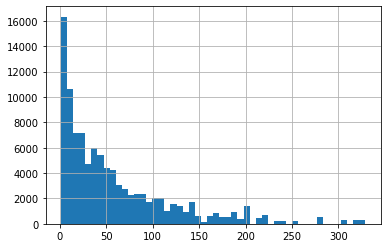

In [51]:
rating_with_totalRatingCount['totalRatingCount'].hist(bins=50
                                 )

In [52]:
popularity_threshold=50
rating_with_popularity=rating_with_totalRatingCount.query('totalRatingCount>=@popularity_threshold')

In [54]:
rating_with_popularity.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [58]:
movie_feature_df=rating_with_popularity.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [61]:
movie_feature_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [68]:
from scipy.sparse import csr_matrix

#To convert the dense matrix into Sparse matrix
movie_features_df_matrix = csr_matrix(movie_feature_df.values)

In [69]:
movie_features_df_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [93]:
movie_feature_df.shape

(450, 606)

In [94]:
#Randomly pickes the row index
query_index=np.random.choice(movie_feature_df.shape[0])
query_index

191

In [95]:
distance,indices=knn.kneighbors(movie_feature_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 6)

In [100]:
distance.flatten()

array([0.        , 0.4872151 , 0.49854565, 0.50119436, 0.5176092 ,
       0.52741396], dtype=float32)

In [97]:
indices

array([[191,  21, 294, 136, 431,  34]], dtype=int64)

In [107]:
for i in range(0,len(distance.flatten())):
    if i==0:
        #If the distance is 0 then it means that the Given movie=Recoomendation movie is same.So that is why we are using the query_index
        print('Recommendation for movie {} is : \n'.format(movie_feature_df.index[query_index]))
    else:
        #Otherwise we will give the idices array.
        print(' {} : {} with distance of {} : \n'.format(i,movie_feature_df.index[indices.flatten()[i]],distance.flatten()[i] ))

Recommendation for movie Happy Gilmore (1996) is : 

 1 : American Pie (1999) with distance of 0.4872151017189026 : 

 2 : Nutty Professor, The (1996) with distance of 0.49854564666748047 : 

 3 : Dumb & Dumber (Dumb and Dumber) (1994) with distance of 0.5011943578720093 : 

 4 : Wayne's World (1992) with distance of 0.517609179019928 : 

 5 : Austin Powers: International Man of Mystery (1997) with distance of 0.5274139642715454 : 

